# Analysis of groundwater levels

*R.A. Collenteur, University of Graz, January 2021*

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from glob import glob
import pastas as ps
import contextily as ctx

ps.set_log_level("ERROR")

In [29]:
fnames = glob("raw_gwl/*.csv")

metadata = {}
timeseries = {}

for fname in fnames:
    series = ps.read_dino(fname)
    metadata[series.name] = series.metadata
    timeseries[series.name] = series.series_original

## Metadata

In [30]:
metadata = pd.DataFrame.from_dict(metadata).transpose()
metadata.to_csv("gwl_metadata.csv")
metadata.head()

x       y      z  projection   Locatie Filternummer  \
B52B0411_1  195310  398480  17.14  epsg:28992  B52B0411          001   
B46C0257_1  189773  407814   9.82  epsg:28992  B46C0257          001   
B46C0256_1  189291  406411  10.52  epsg:28992  B46C0256          001   
B46D0791_1  193990  406450    5.2  epsg:28992  B46D0791          001   
B46D0790_1  193940  406540   7.33  epsg:28992  B46D0790          001   

           Externe aanduiding X-coordinaat Y-coordinaat  \
B52B0411_1           52BL0010       195310       398480   
B46C0257_1                          189773       407814   
B46C0256_1                          189291       406411   
B46D0791_1           46DB0012       193990       406450   
B46D0790_1           46DB0011       193940       406540   

           Maaiveld (cm t.o.v. NAP) Datum maaiveld gemeten  Startdatum  \
B52B0411_1                     1954             10-03-2016  10-03-2016   
B46C0257_1                     1276             26-04-2006  05-01-2011   
B46C0256_1                     1330             05-01-2011  05-01-2011   
B46D0791_1                     1250             14-06-1950  14-10-1960   
B46D0790_1                     1244             14-06-1950  14-10-1960   

             Einddatum Meetpunt (cm t.o.v. NAP) Meetpunt (cm t.o.v. MV)  \
B52B0411_1  18-12-2018                     1940                     -32   
B46C0257_1  17-01-2017                     1346                           
B46C0256_1  13-09-2018                     1400                           
B46D0791_1  28-12-1991                     1247                      -3   
B46D0790_1  28-12-1991                     1251                       7   

           Bovenkant filter (cm t.o.v. NAP) Onderkant filter (cm t.o.v. NAP)  
B52B0411_1                             1739                             1689  
B46C0257_1                             1032                              932  
B46C0256_1                             1102                             1002  
B46D0791_1                              870                              170  
B46D0790_1                             1083                              383

## Time series

In [31]:
timeseries = pd.DataFrame.from_dict(timeseries)
timeseries.to_csv("gwl_timeseries.csv")
timeseries.head()

B52B0411_1  B46C0257_1  B46C0256_1  B46D0791_1  B46D0790_1  \
1950-01-26         NaN         NaN         NaN         NaN         NaN   
1950-02-14         NaN         NaN         NaN         NaN         NaN   
1950-02-28         NaN         NaN         NaN         NaN         NaN   
1950-03-14         NaN         NaN         NaN         NaN         NaN   
1950-03-30         NaN         NaN         NaN         NaN         NaN   

            B46D0826_1  B46D0827_1  B46D0982_1  B46D0983_1  B46D0818_1  ...  \
1950-01-26         NaN         NaN         NaN         NaN         NaN  ...   
1950-02-14         NaN         NaN         NaN         NaN         NaN  ...   
1950-02-28         NaN         NaN         NaN         NaN         NaN  ...   
1950-03-14         NaN         NaN         NaN         NaN         NaN  ...   
1950-03-30         NaN         NaN         NaN         NaN         NaN  ...   

            B52B0403_1  B46D1184_1  B46D1185_1  B46C0245_1  B46D0055_1  \
1950-01-26         NaN         NaN         NaN         NaN         NaN   
1950-02-14         NaN         NaN         NaN         NaN         NaN   
1950-02-28         NaN         NaN         NaN         NaN         NaN   
1950-03-14         NaN         NaN         NaN         NaN         NaN   
1950-03-30         NaN         NaN         NaN         NaN         NaN   

            B46D0991_1  B46D0990_1  B46C0500_1  B46D0825_2  B46D0824_2  
1950-01-26         NaN         NaN         NaN         NaN         NaN  
1950-02-14         NaN         NaN         NaN         NaN         NaN  
1950-02-28         NaN         NaN         NaN         NaN         NaN  
1950-03-14         NaN         NaN         NaN         NaN         NaN  
1950-03-30         NaN         NaN         NaN         NaN         NaN  

[5 rows x 264 columns]

## Plot van de locaties

In [23]:
gdf = gpd.GeoDataFrame(metadata, geometry=gpd.points_from_xy(metadata.x, metadata.y), crs="epsg:28992")
gdf = gdf.to_crs(epsg=3857)

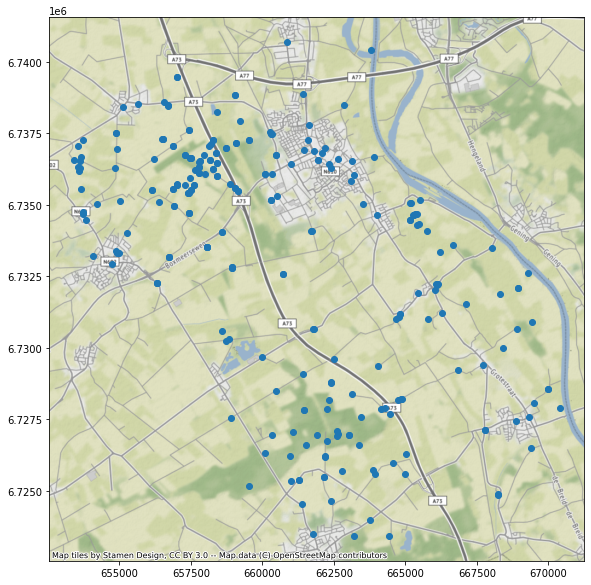

In [25]:
ax = gdf.plot(figsize=(10,10))
ctx.add_basemap(ax)

## Plot the time series
Below the groundwater level time series are plotted for easy reference.

/Applications/anaconda3/envs/py37_pastas/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


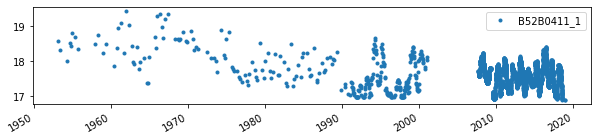

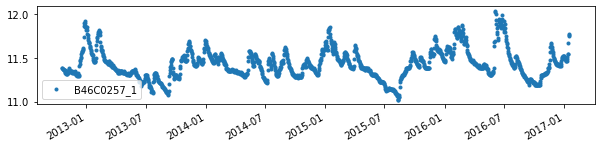

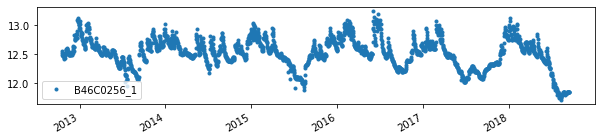

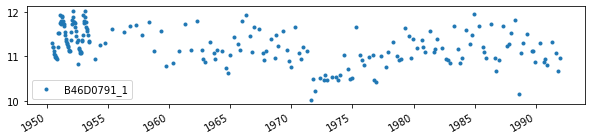

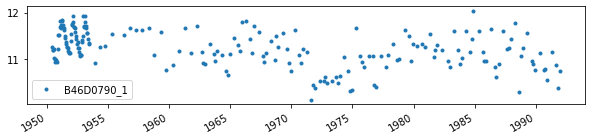

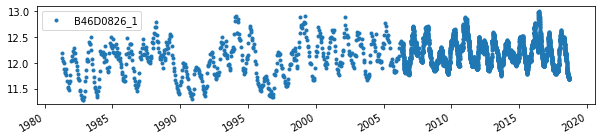

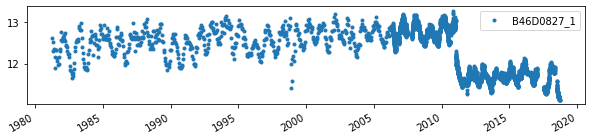

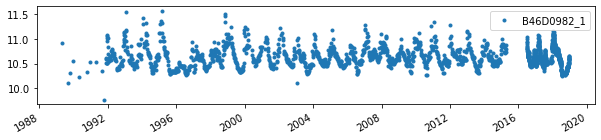

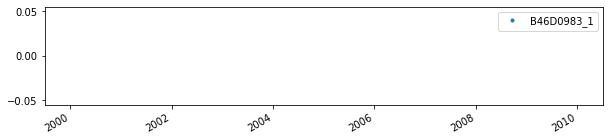

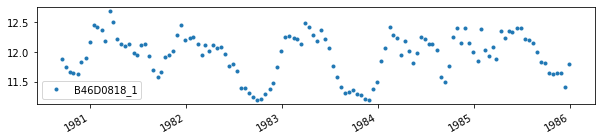

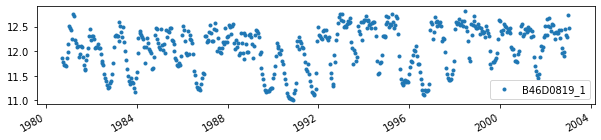

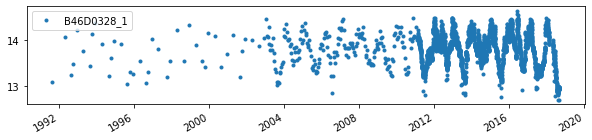

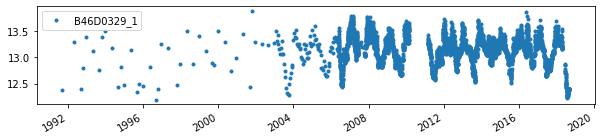

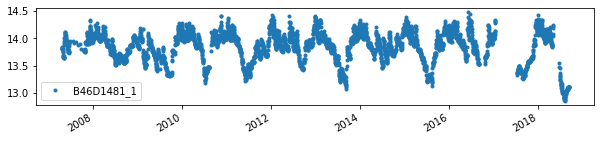

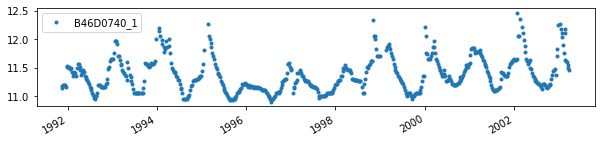

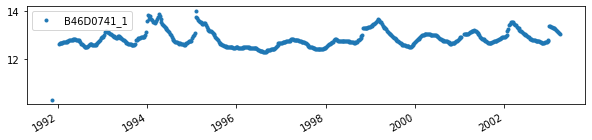

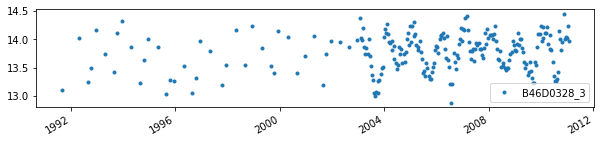

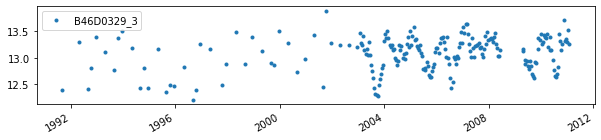

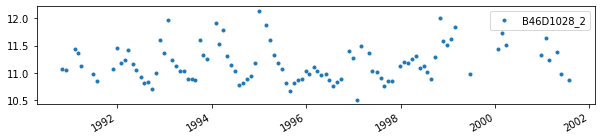

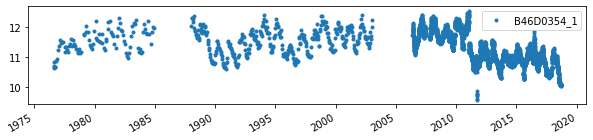

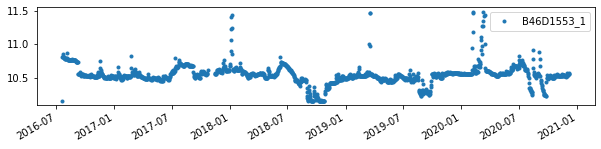

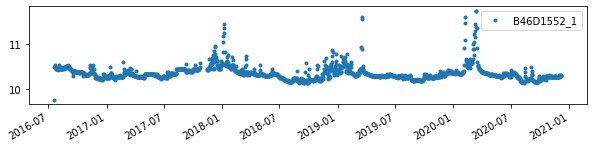

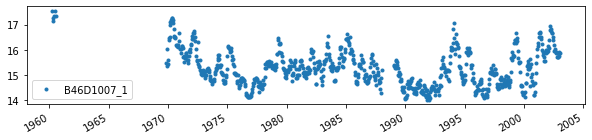

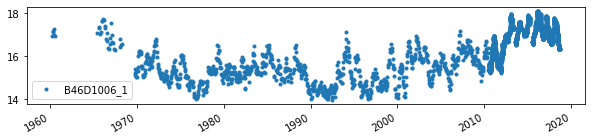

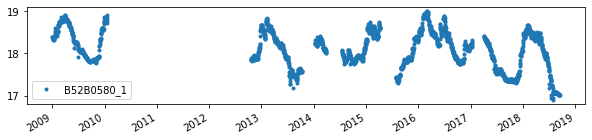

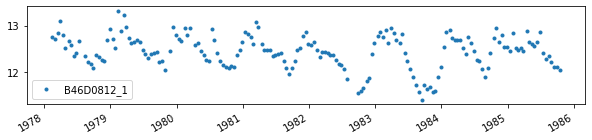

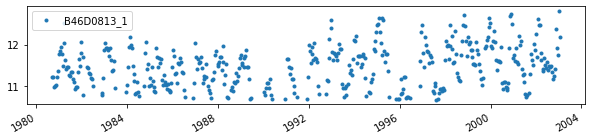

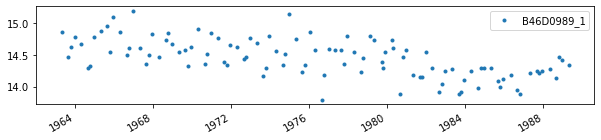

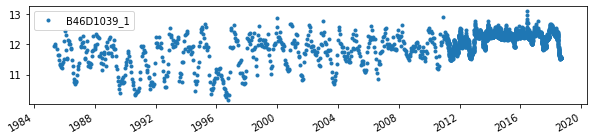

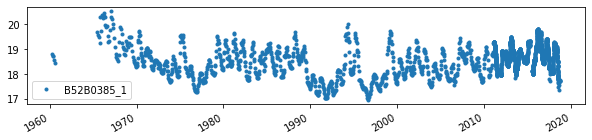

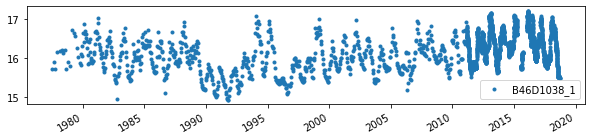

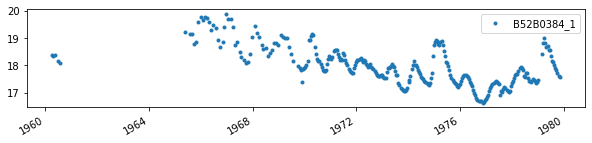

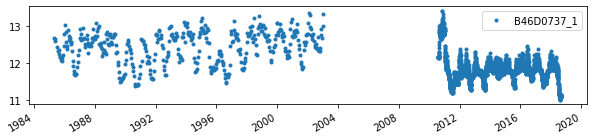

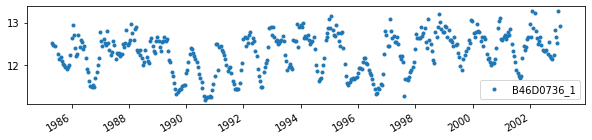

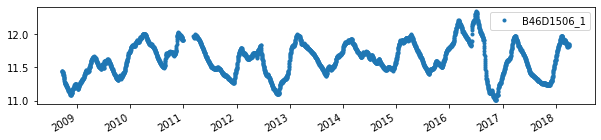

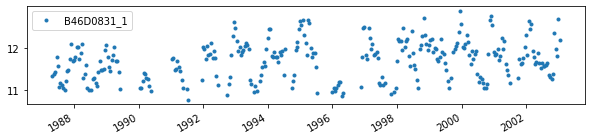

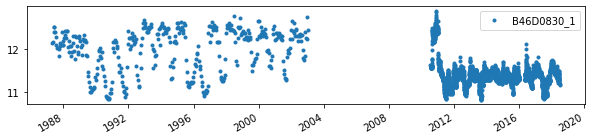

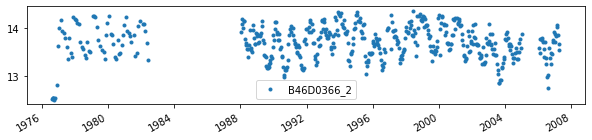

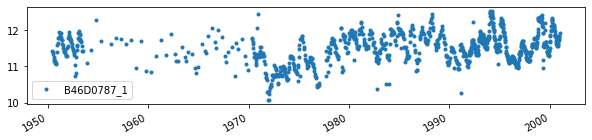

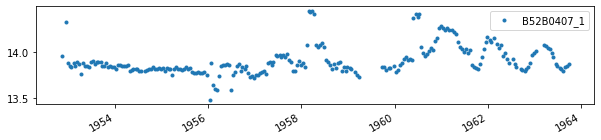

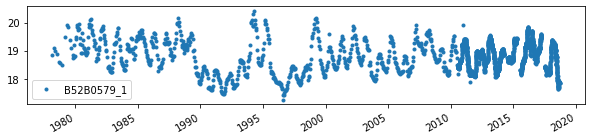

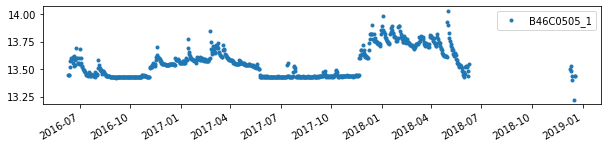

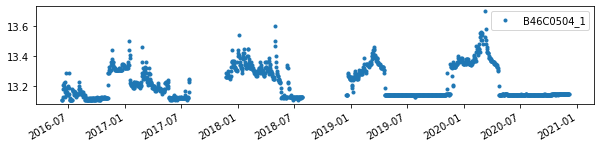

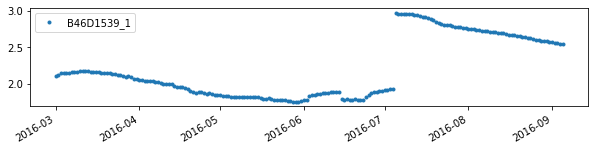

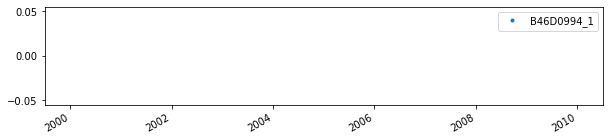

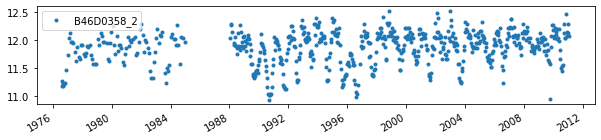

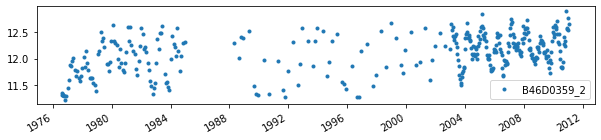

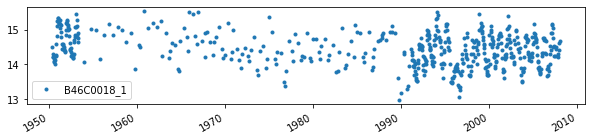

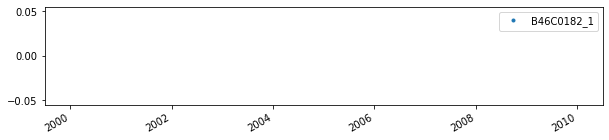

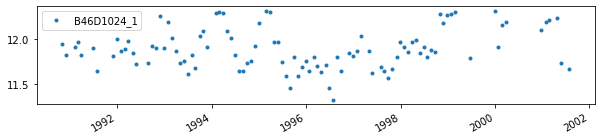

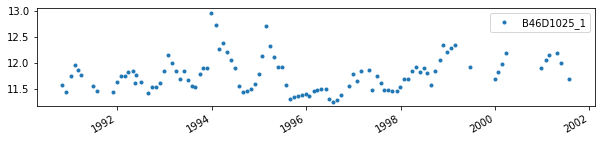

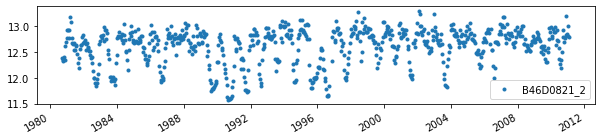

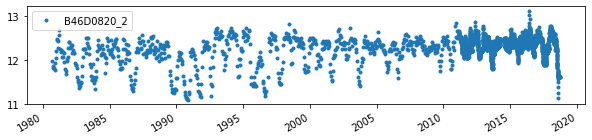

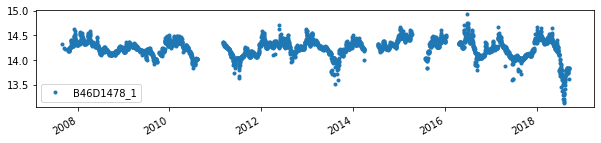

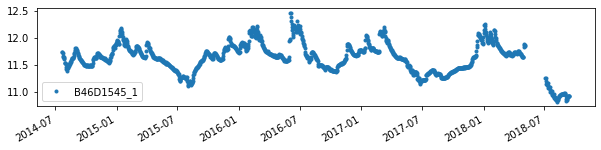

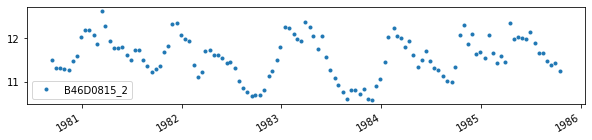

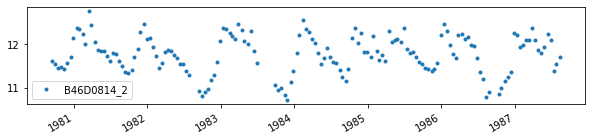

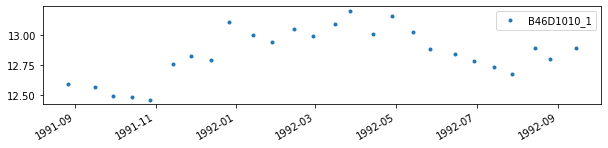

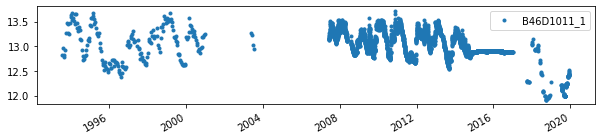

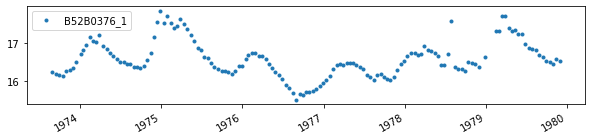

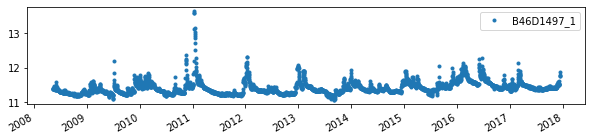

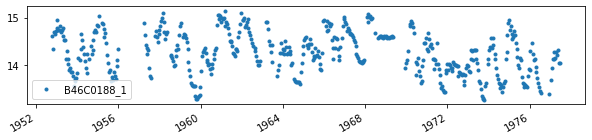

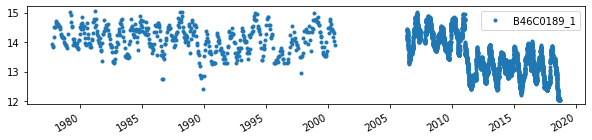

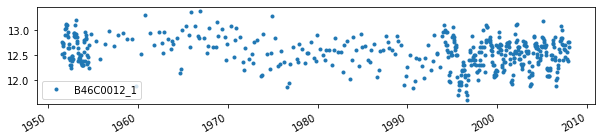

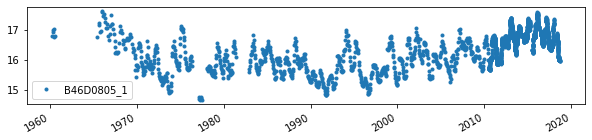

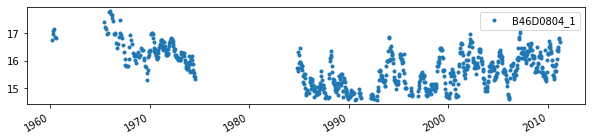

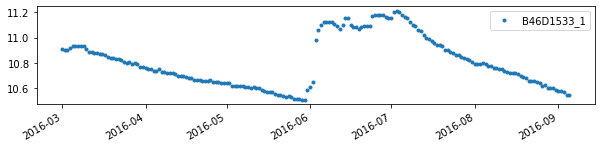

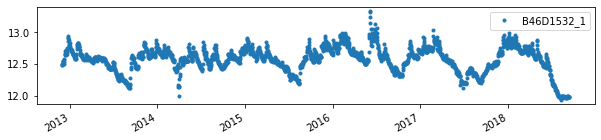

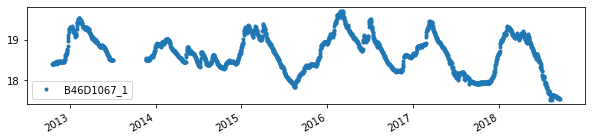

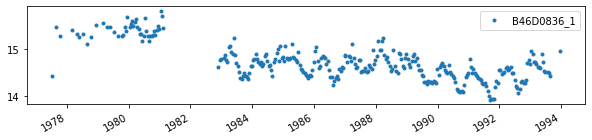

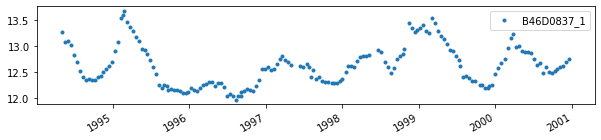

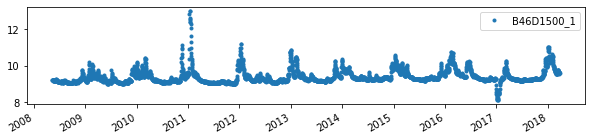

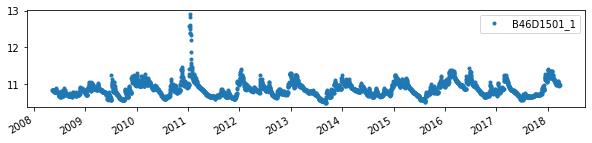

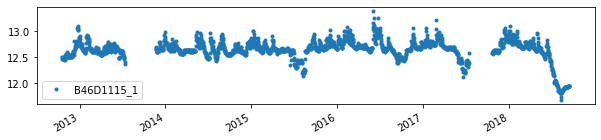

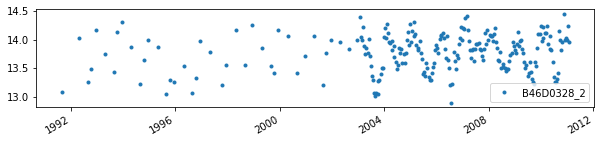

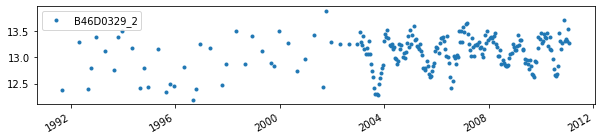

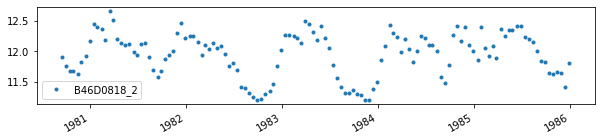

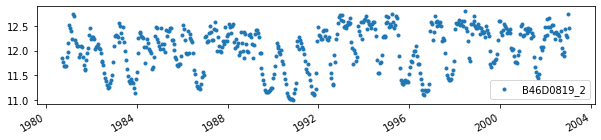

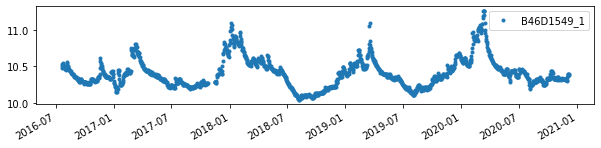

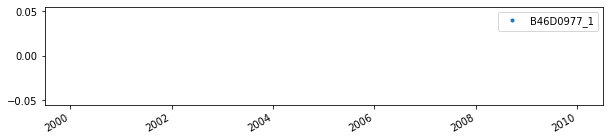

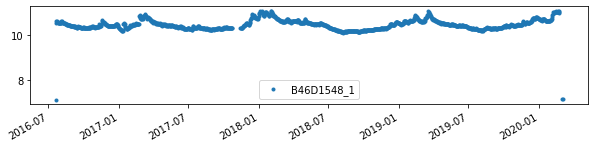

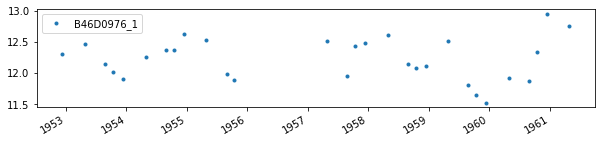

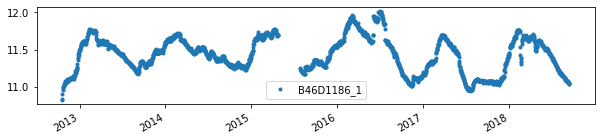

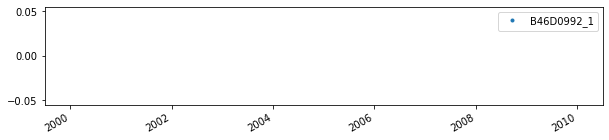

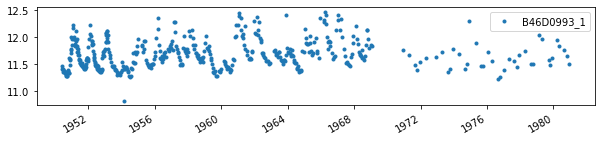

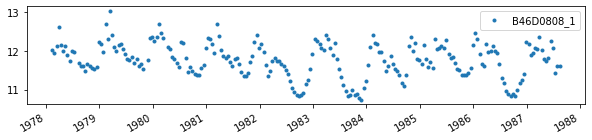

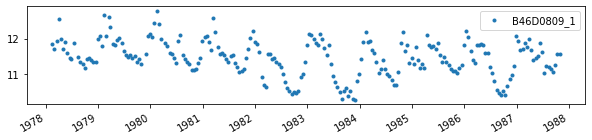

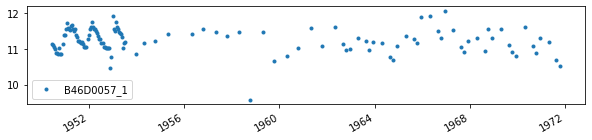

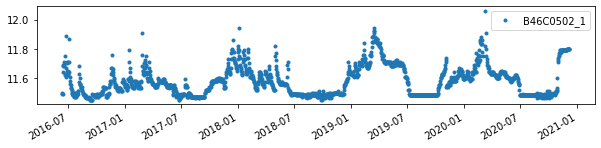

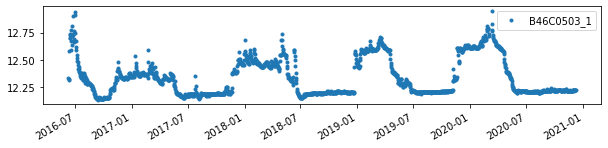

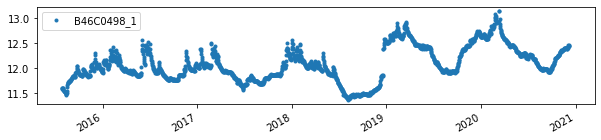

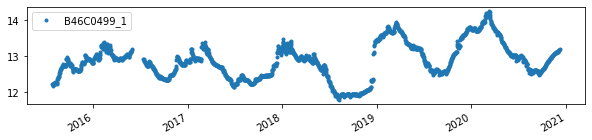

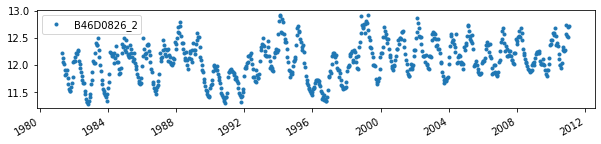

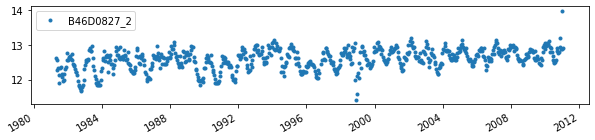

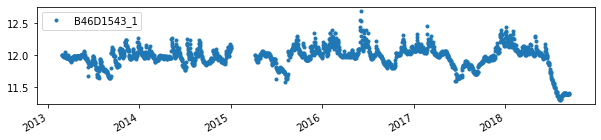

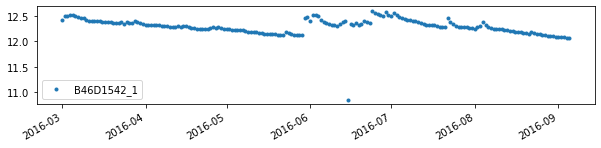

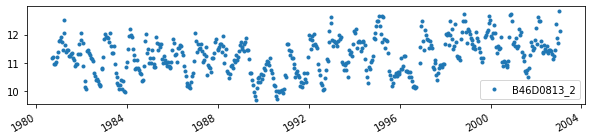

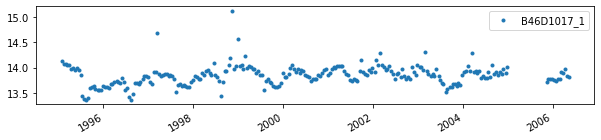

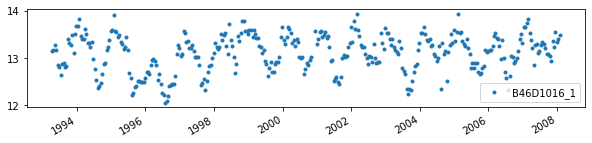

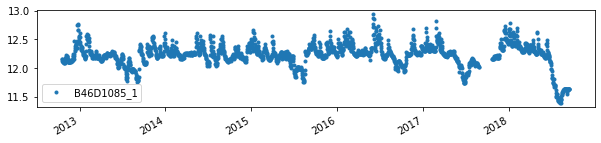

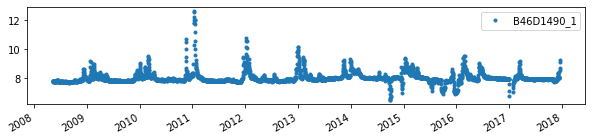

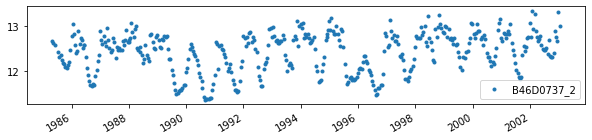

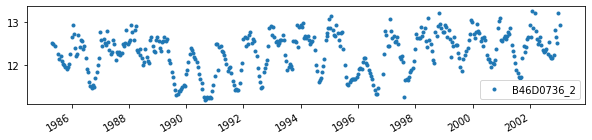

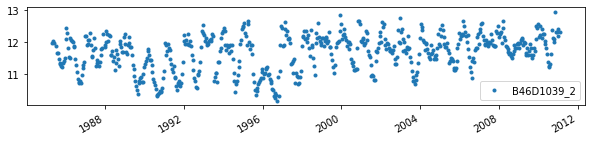

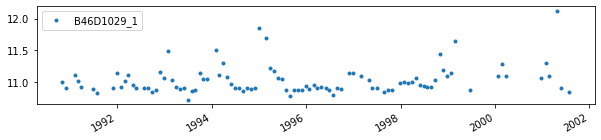

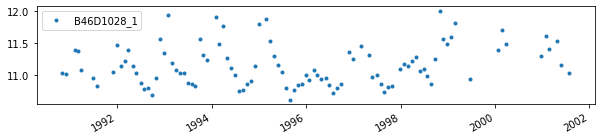

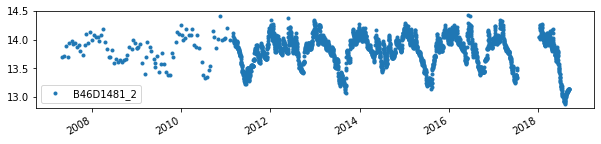

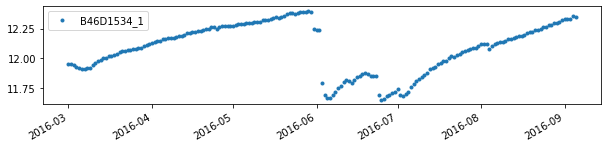

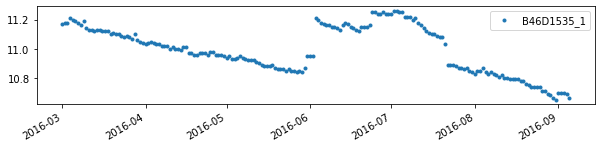

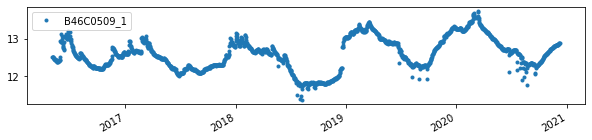

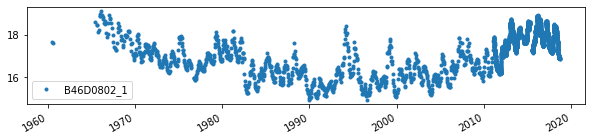

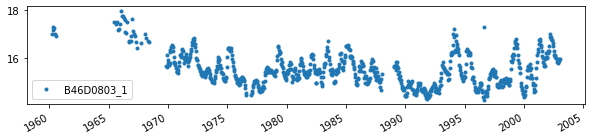

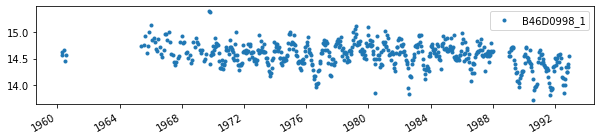

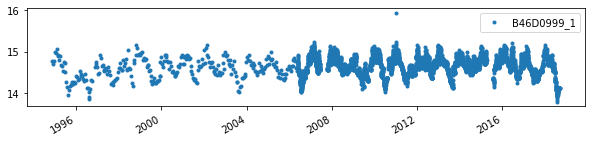

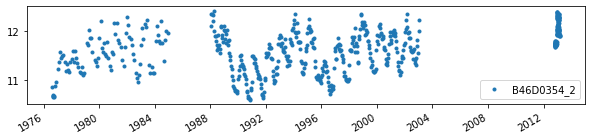

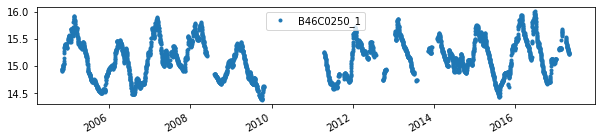

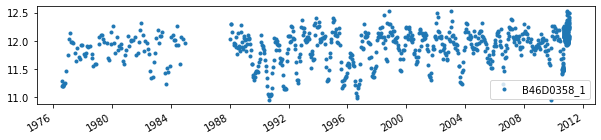

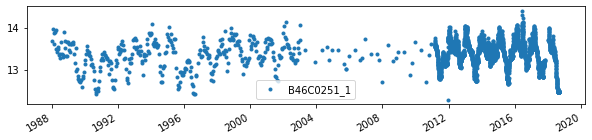

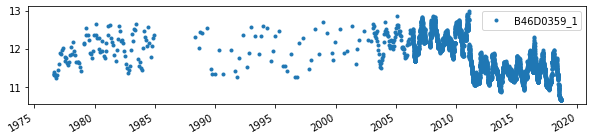

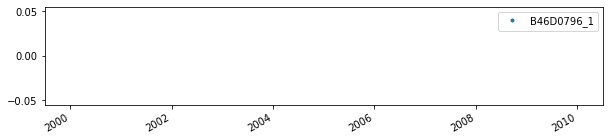

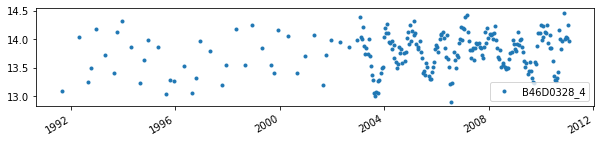

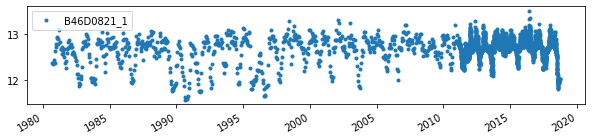

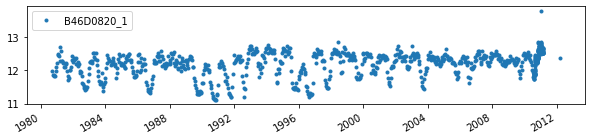

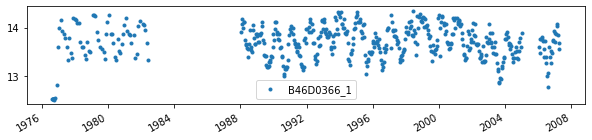

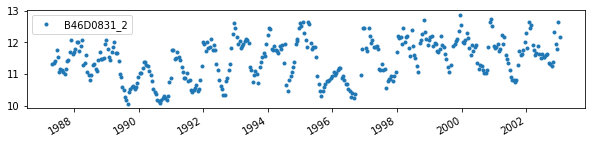

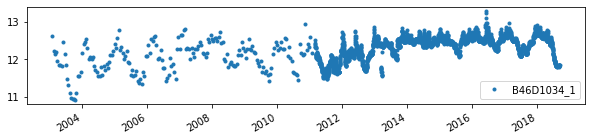

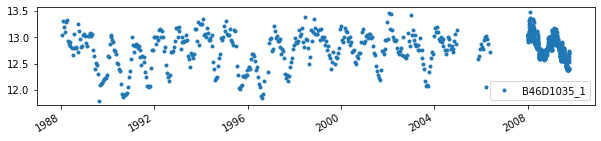

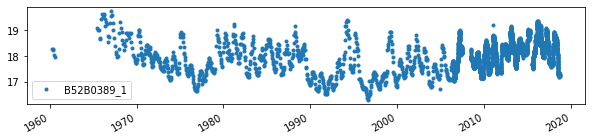

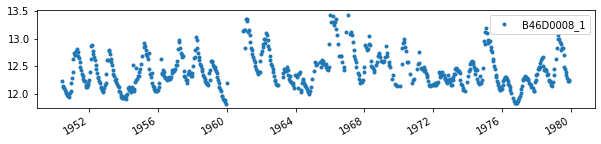

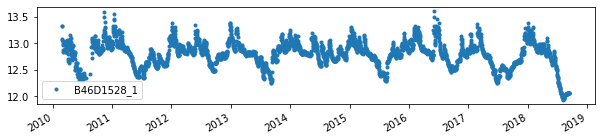

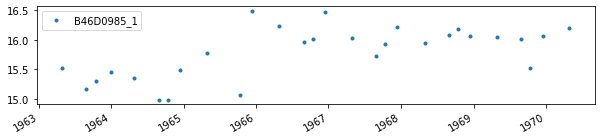

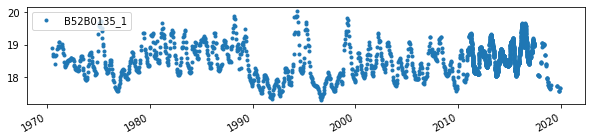

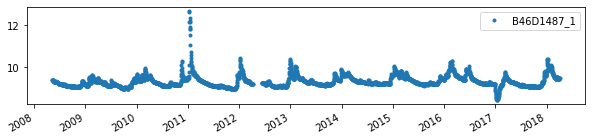

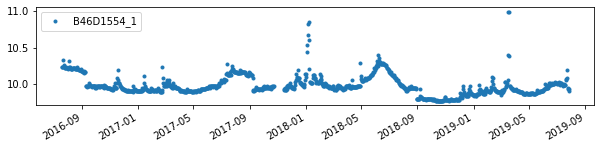

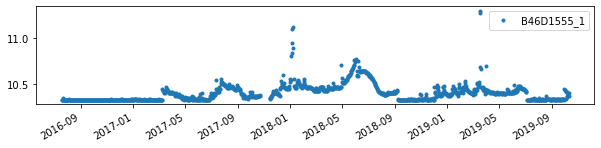

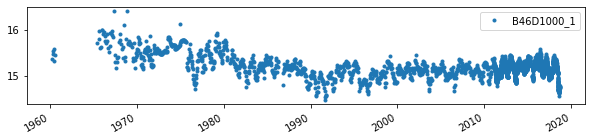

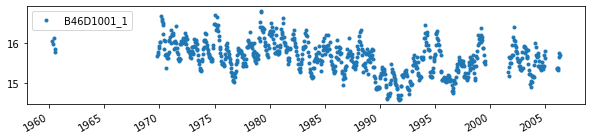

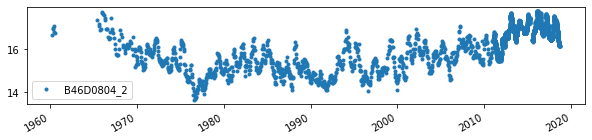

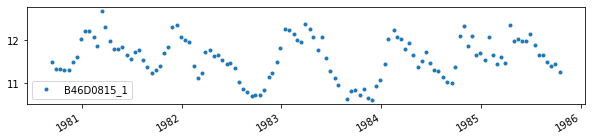

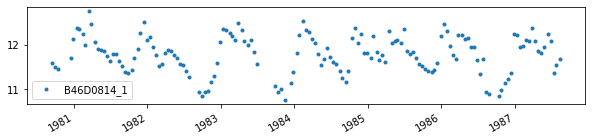

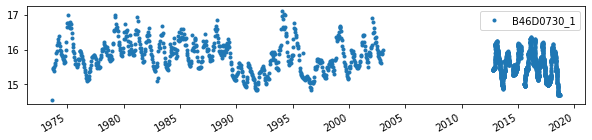

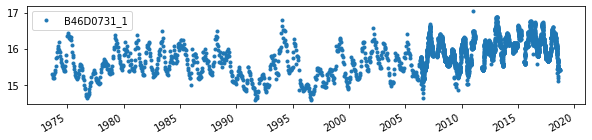

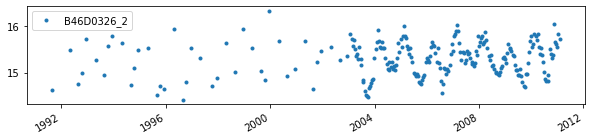

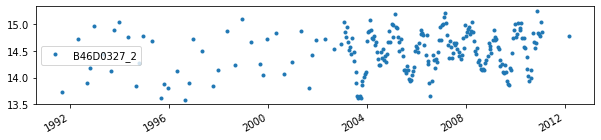

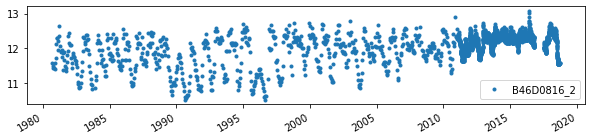

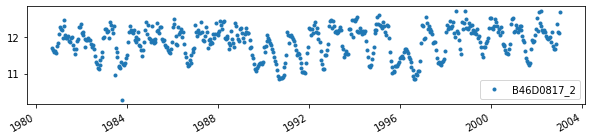

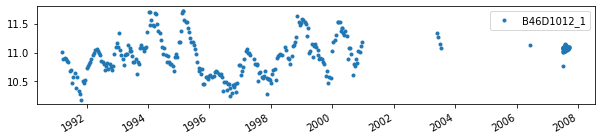

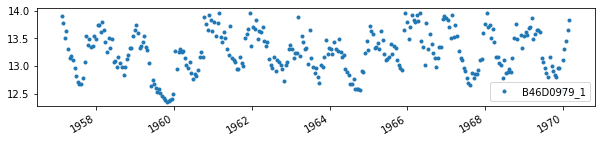

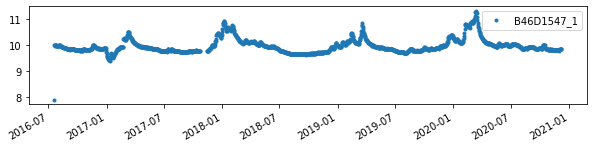

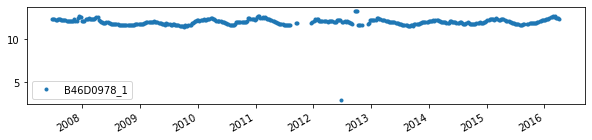

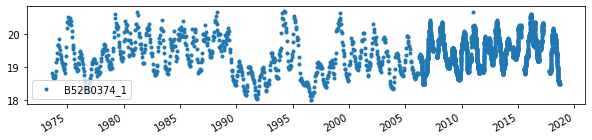

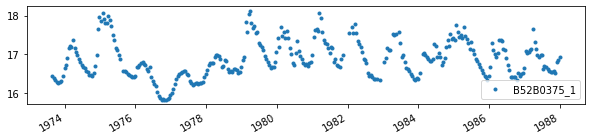

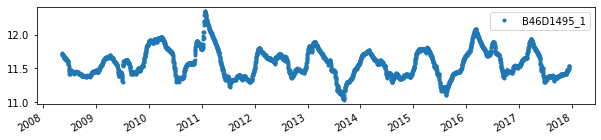

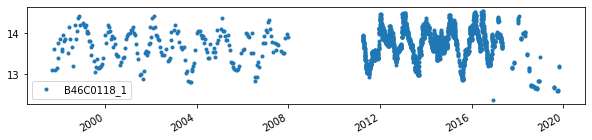

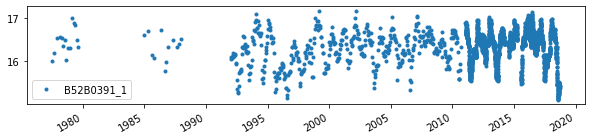

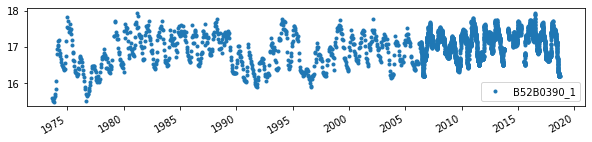

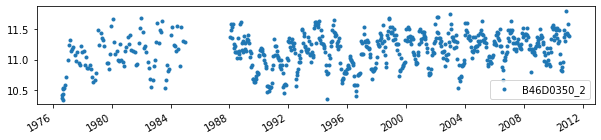

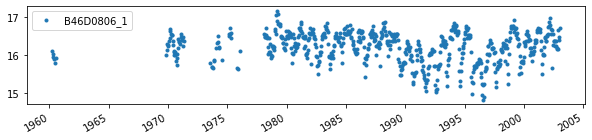

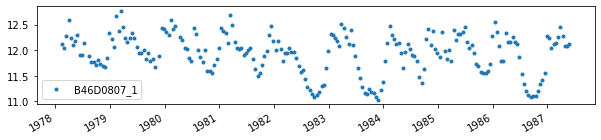

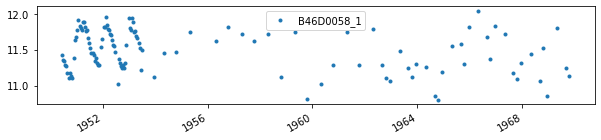

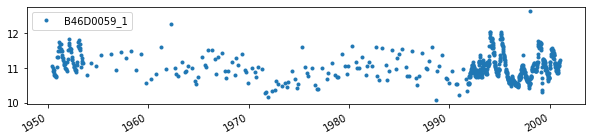

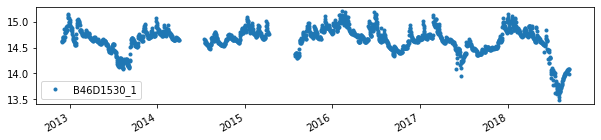

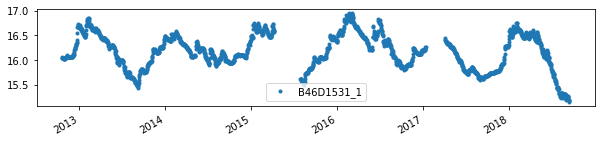

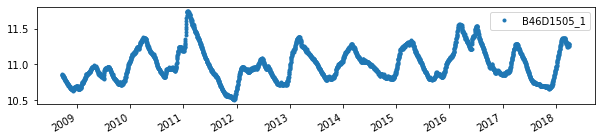

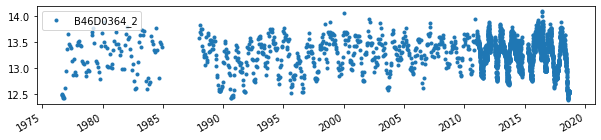

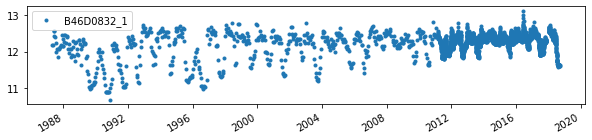

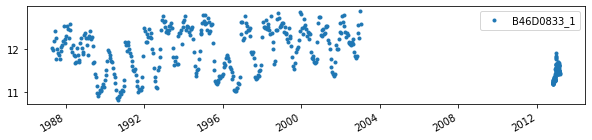

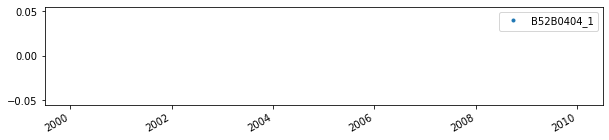

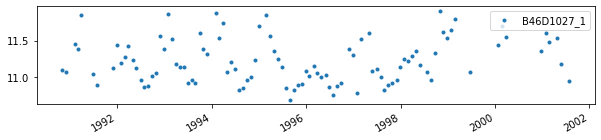

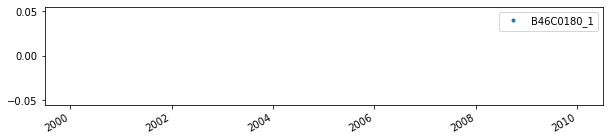

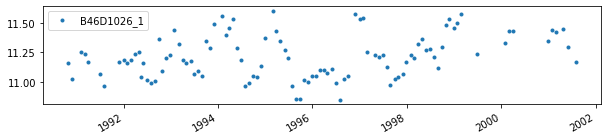

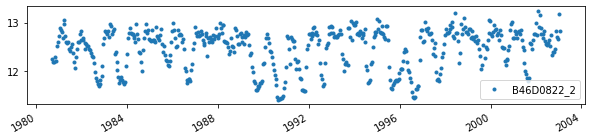

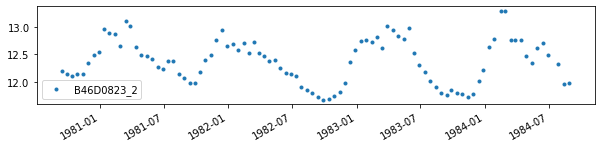

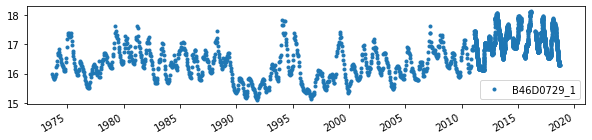

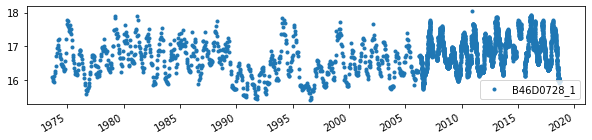

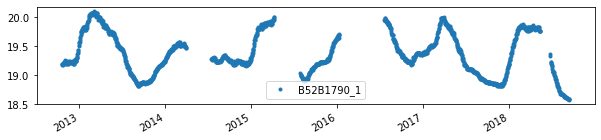

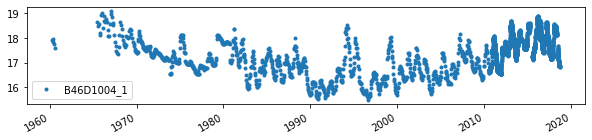

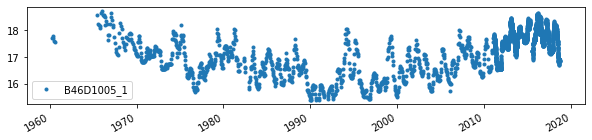

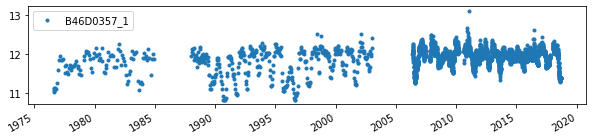

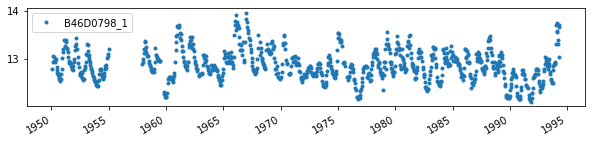

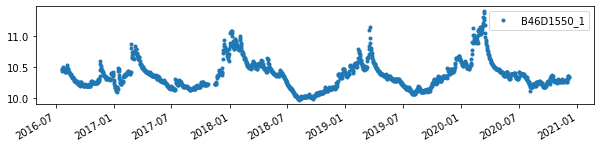

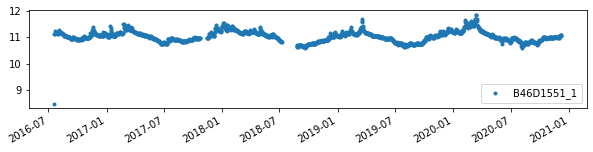

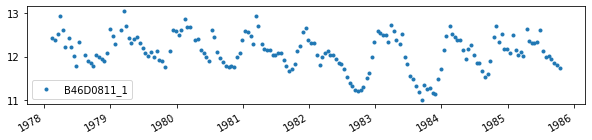

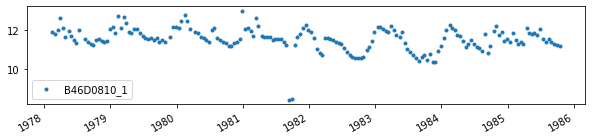

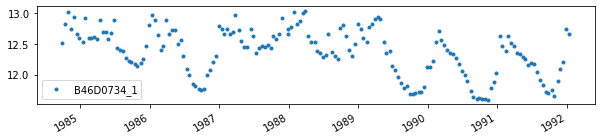

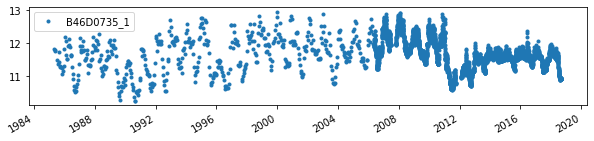

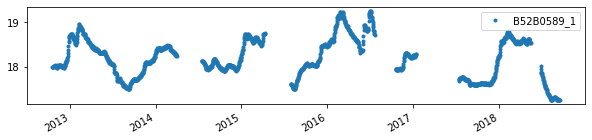

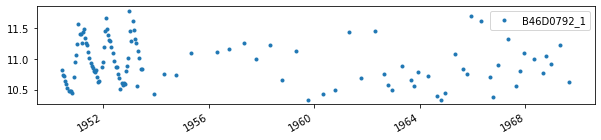

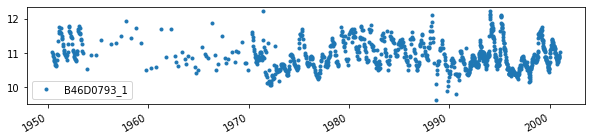

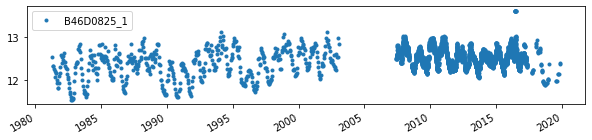

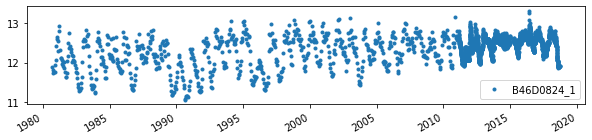

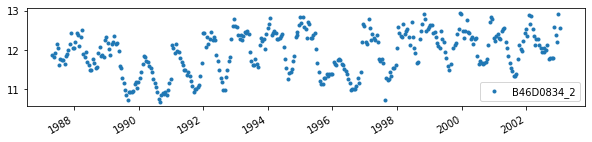

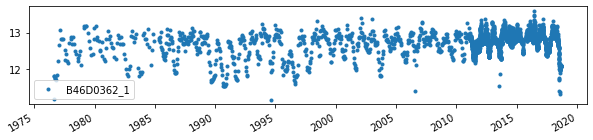

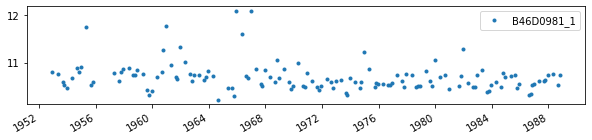

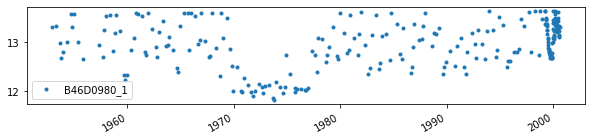

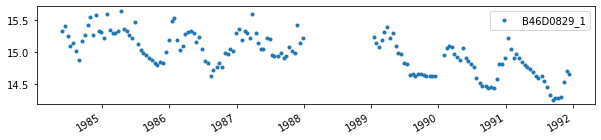

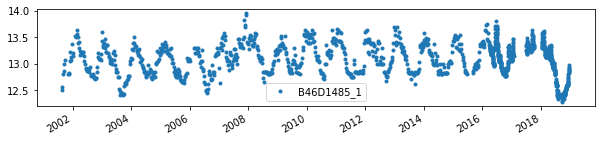

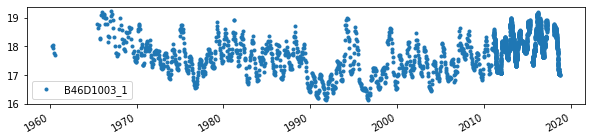

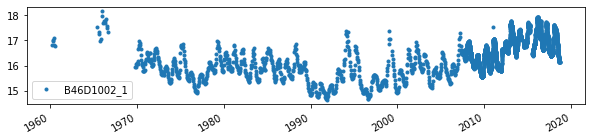

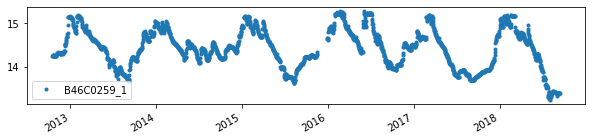

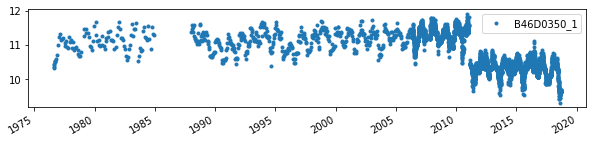

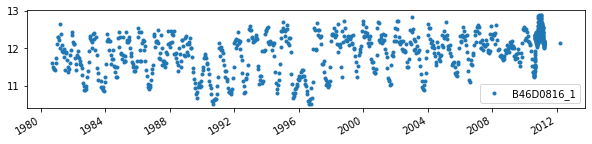

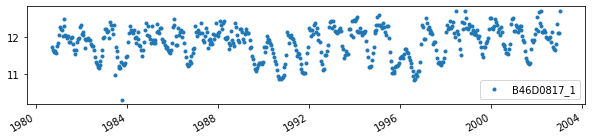

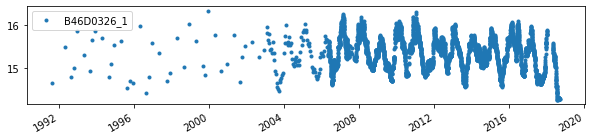

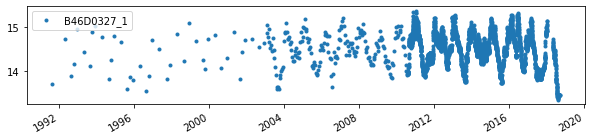

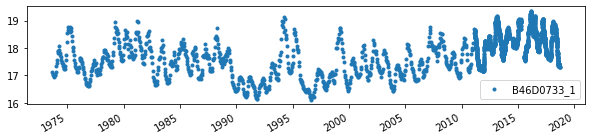

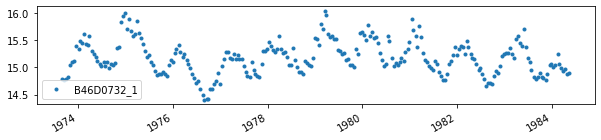

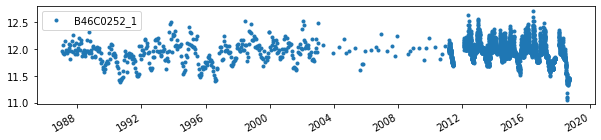

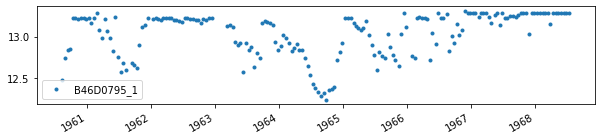

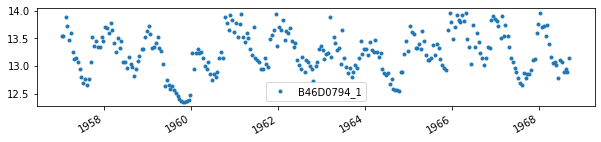

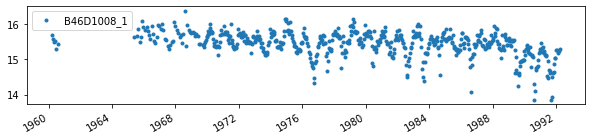

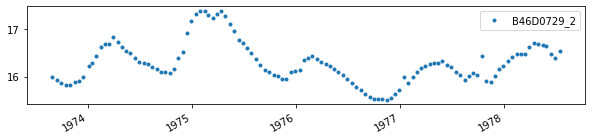

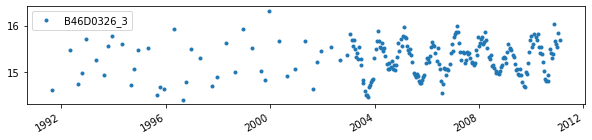

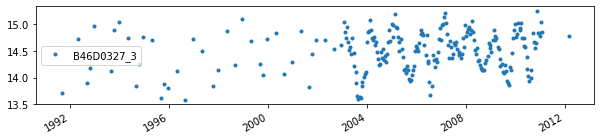

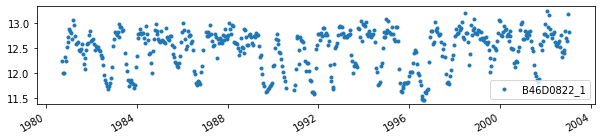

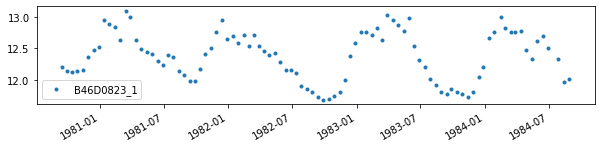

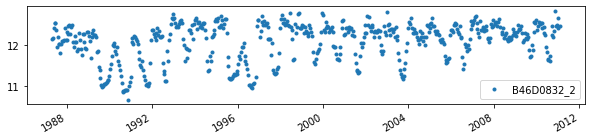

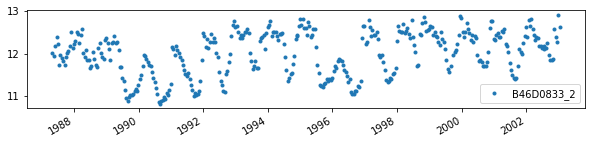

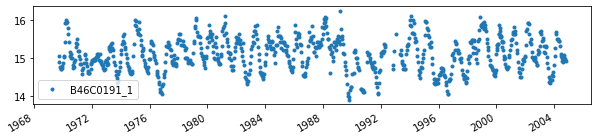

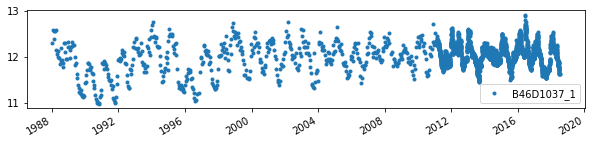

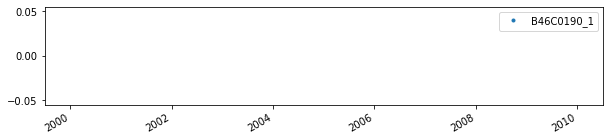

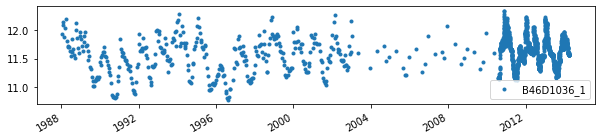

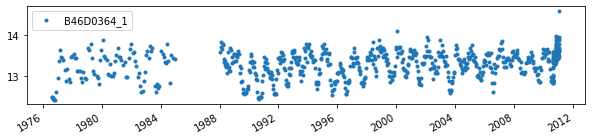

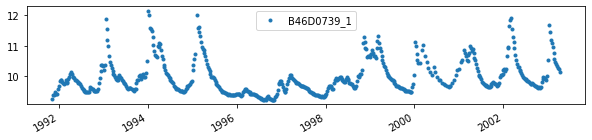

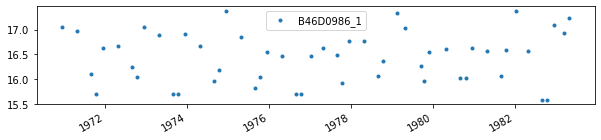

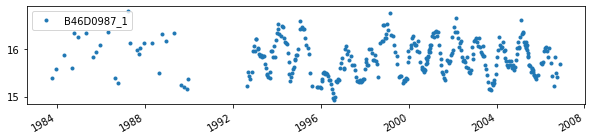

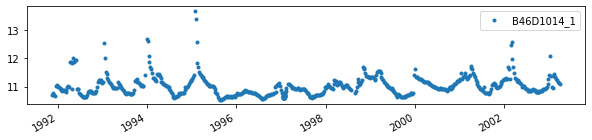

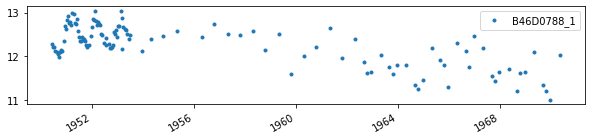

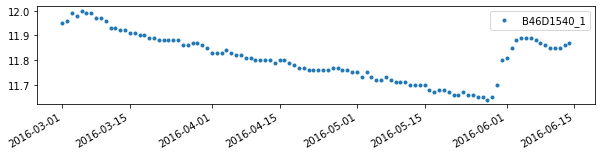

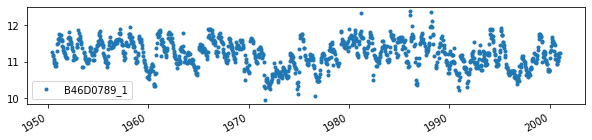

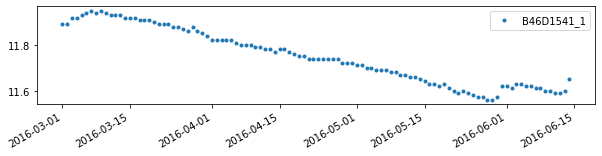

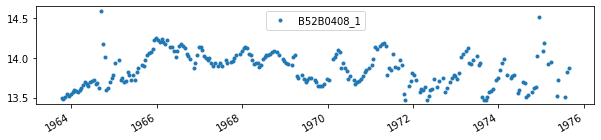

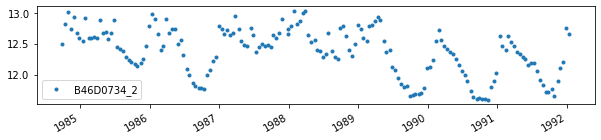

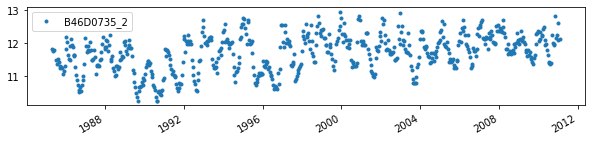

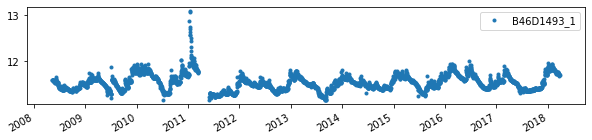

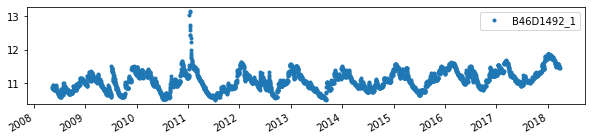

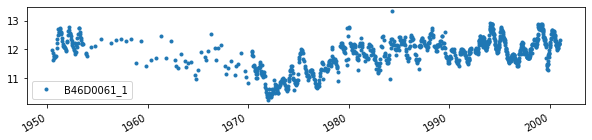

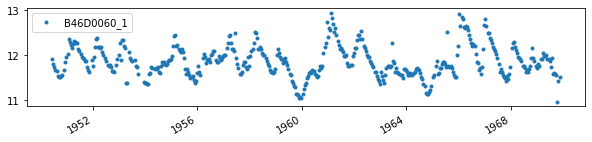

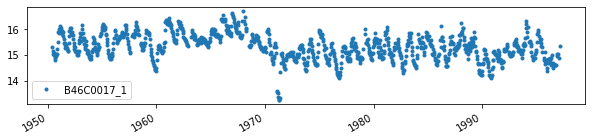

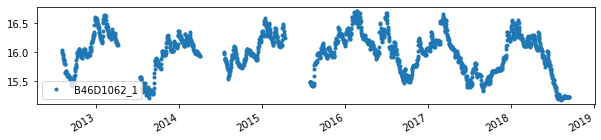

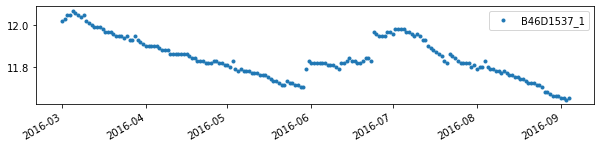

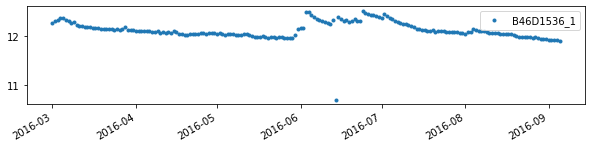

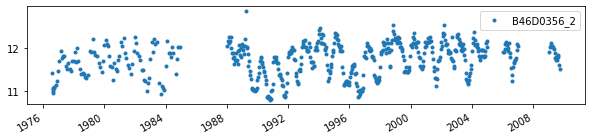

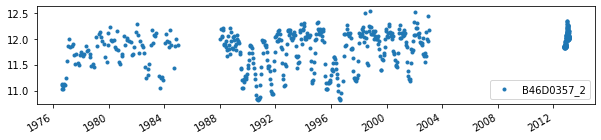

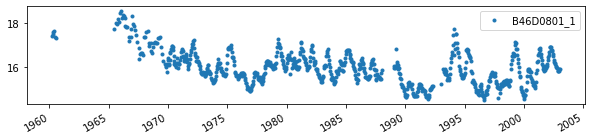

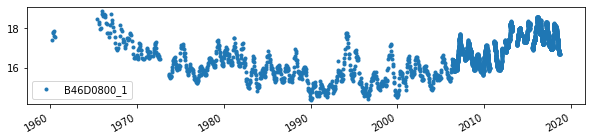

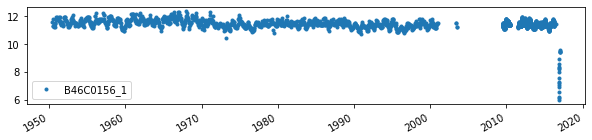

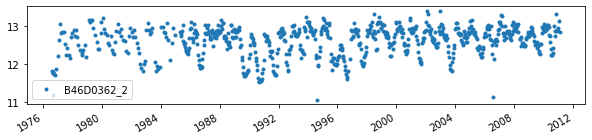

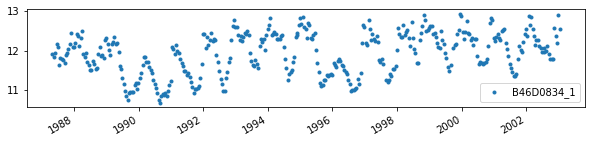

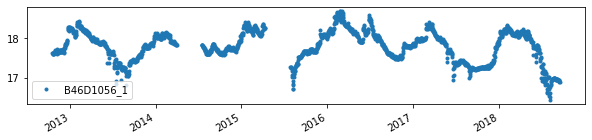

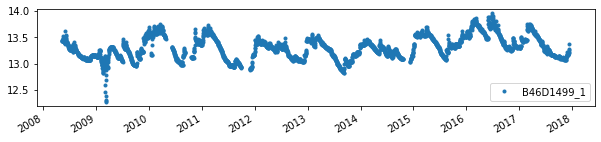

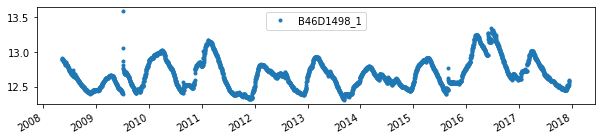

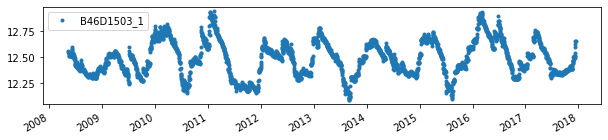

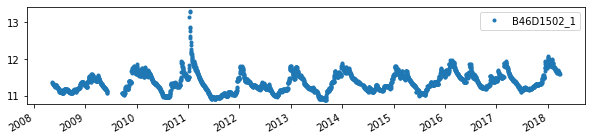

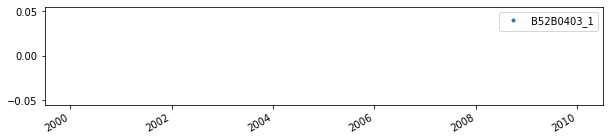

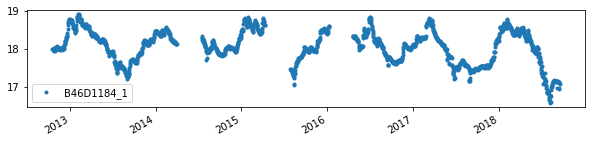

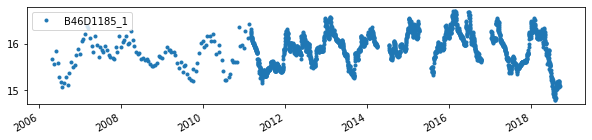

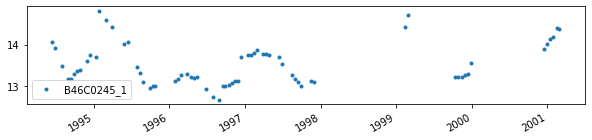

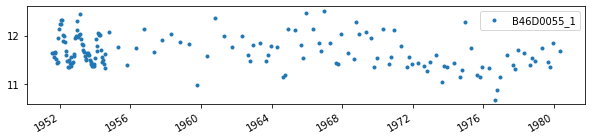

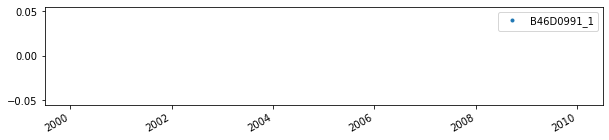

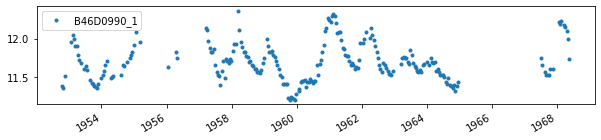

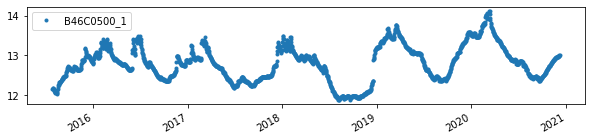

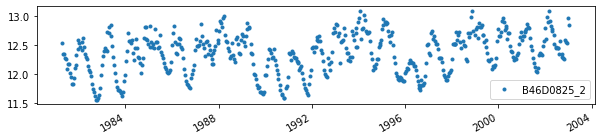

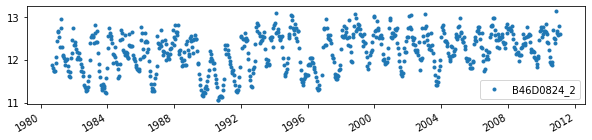

In [47]:
for i in range(len(timeseries.columns)):
    plt.figure()
    timeseries.iloc[:, i].plot(marker=".", linestyle=" ", label=timeseries.columns[i], figsize=(10, 2))
    plt.legend()